In [1]:
%matplotlib inline
# -*- coding: utf-8 -*-
"""
Created on Wed Oct 12 23:56:37 2016

@author: tabacof
"""

import pystan
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

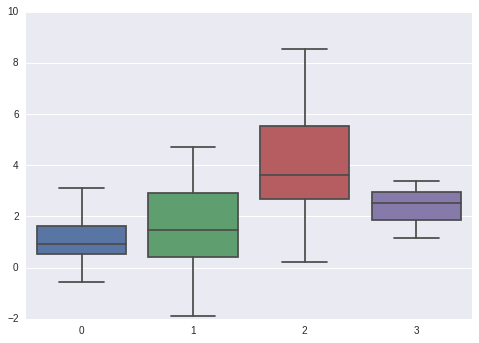

In [2]:
N = 20
K = 4
y = np.random.normal(1.0, size = (N, K))
y[:, 1] *= 2.0
y[:, 2] += 1.0
y[:, 2] *= 2.0
y[:, 3] += 1.0

sns.boxplot(data = y)
plt.show()

In [20]:
code = '''
data {
    int K; // Number of groups
    int N; // Number of examples per group
    real y[N, K]; // Observations 
}
parameters {
    real mu; // Mean
    vector[K-1] theta_free; // Effects
    real<lower=0> sigma_likelihood; // Noise std
    real<lower=0> sigma_theta; // Effect std
}
transformed parameters {
  vector[K] theta; // Effects with sum to zero constraint

  for(k in 1:(K-1)) theta[k] <- theta_free[k];
  theta[K] <- -sum(theta_free);
}
model {
    mu ~ normal(0, 10);
    sigma_likelihood ~ uniform(0, 100); // Weak noise std prior
    theta_free ~ normal(0, sigma_theta); // Weak effect prior
    sigma_theta ~ cauchy(0, 25); 
    for (i in 1:N)
        for (j in 1:K)
            y[i][j] ~ normal(mu + theta[j], sigma_likelihood);
}
'''

data = {
    'K': K,
    'N': N,
    'y': y,
}

fit = pystan.stan(model_code=code, data=data, iter=1000, chains=4)

/home/tabacof/anaconda2/envs/python3/lib/python3.5/multiprocessing/reduction.py:50: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  cls(buf, protocol).dump(obj)
/home/tabacof/anaconda2/envs/python3/lib/python3.5/multiprocessing/reduction.py:50: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  cls(buf, protocol).dump(obj)
/home/tabacof/anaconda2/envs/python3/lib/python3.5/multiprocessing/reduction.py:50: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  cls(buf, protocol).dump(obj)
/home/tabacof/anaconda2/envs/python3/lib/python3.5/multiprocessing/reduction

/home/tabacof/anaconda2/envs/python3/lib/python3.5/multiprocessing/reduction.py:50: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  cls(buf, protocol).dump(obj)
/home/tabacof/anaconda2/envs/python3/lib/python3.5/multiprocessing/reduction.py:50: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  cls(buf, protocol).dump(obj)
/home/tabacof/anaconda2/envs/python3/lib/python3.5/multiprocessing/reduction.py:50: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  cls(buf, protocol).dump(obj)
/home/tabacof/anaconda2/envs/python3/lib/python3.5/multiprocessing/reduction

Inference for Stan model: anon_model_1967665b99160b0ba8694ab613d646dd.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

                   mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu                 2.24  3.9e-3   0.17   1.91   2.12   2.24   2.35   2.58   2000    1.0
theta_free[0]     -1.15  6.5e-3   0.29  -1.73  -1.35  -1.15  -0.96  -0.56   2000    1.0
theta_free[1]     -0.64  6.4e-3   0.29   -1.2  -0.83  -0.64  -0.44   -0.1   2000    1.0
theta_free[2]      1.64  6.8e-3   0.31   1.06   1.42   1.65   1.84   2.23   2000    1.0
sigma_likelihood   1.51  2.7e-3   0.12    1.3   1.43   1.51   1.59   1.77   2000    1.0
sigma_theta        2.44    0.05   2.27   0.73   1.23   1.79   2.79   8.18   2000    1.0
theta[0]          -1.15  6.5e-3   0.29  -1.73  -1.35  -1.15  -0.96  -0.56   2000    1.0
theta[1]          -0.64  6.4e-3   0.29   -1.2  -0.83  -0.64  -0.44   -0.1   2000    1.0
theta[2]           1.

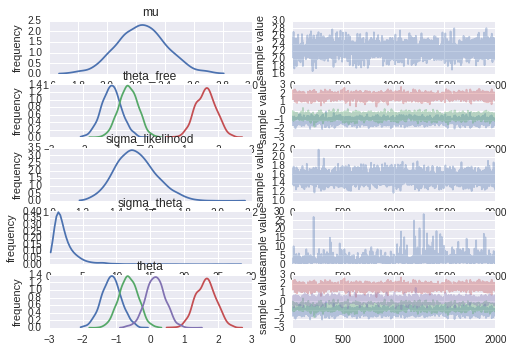

In [21]:
new_fit = pystan.stan(fit=fit, data=data)
print(fit)
fit.plot()
trace = fit.extract()